**Author:** Florent Schaffhauser, Uni-Heidelberg, Summer Semester 2023

# Least squares approximation

**Definition.**
A *scatter plot in the plane* is a family $(x_i,y_i)_{1\leq i\leq n}$ of $n$ points in $\mathbb{R}^2$.

As we know, it is possible, using Lagrange interpolation, to find a polynomial $ P $, of degree $(n-1)$, passing through these $n$ points, meaning that it satisfies $P(x_i)=y_i$ for all $i$. However, the behaviour of $P$ at other points $x$ may have very little to do with the way the points are distributed in the plane, as shown by the following example.

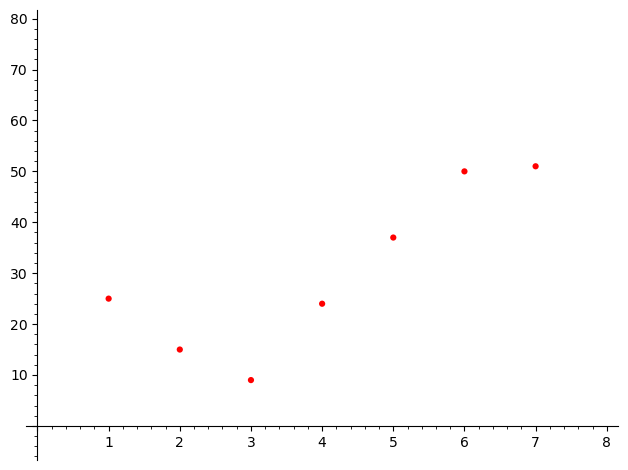

In [1]:
# First, we plot a few points in the plane, entering the coordinates by hand in this case
# The code below is written in a way that, if you want to add a point, you just edit the data list
data = [(1,25),(2,15),(3,9),(4,24),(5,37),(6,50),(7,51)]
G = plot([])
G += list_plot(data, size = 20, color = 'red', 
xmin = 0, xmax = 8, ymin = -5, ymax = 80)
G

If one had to describe this scatter plot, one would say that, at least starting from $x=2$, the points seem to lie on the graph of an increasing function. And if we draw the Lagrange interpolation polynomial, we obtain the following graph.

In [2]:
# Sage has a function that computes the Lagrange interpolation polynomial
R = PolynomialRing(QQ, 'x')
P = R.lagrange_polynomial(data)
show(P)

-13/90*x^6 + 143/40*x^5 - 2525/72*x^4 + 4121/24*x^3 - 154723/360*x^2 + 30103/60*x - 187

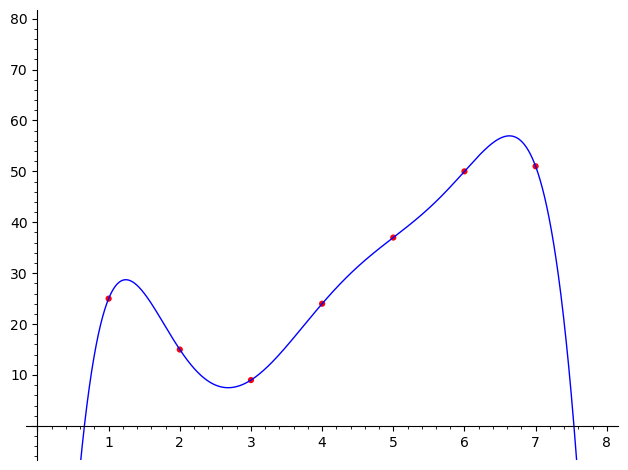

In [3]:
# We can add the graph of P to the scatter plot in the following way, using the command '+='
G += P.plot(xmin=0,xmax=8,ymin=-5,ymax=80)
G

So it is clear that, at least in this example, the Lagrane polynomial has very little predictive value: if we look at it value at $x=8$ for instance, we do not expect the point $(8,y_8)$ to be related to our data.

In [4]:
A = matrix(QQ, [[1,1],[2,1],[3,1],[4,1],[5,1],[6,1],[7,1]])

In [5]:
Y = matrix(QQ, [[25],[15],[9],[24],[37],[50],[51]])

So let us see how to make better approximate our scatter plot using the *least squares method*, also called *linear regression* or *data linearisation*.

First, we choose a model. Based on the shape of the scatter plot, we figure that an affine line of equation $ y = a x + b $ should provide a reasonably good approximation. 

Second, by definition of the *least squares approximation*, we study the following *optimisation problem*, for which the initial data is the scatter plot $ ( x_i, y_i )_{1 \leq i \leq 7} $ and the unknowns are the parameters of our model, meaning the real numbers $ (a,b) $.

$$
\min_{(a,b)\in\mathbb{R}^2} \big(y_1-(ax_1+b)\big)^2 + \big(y_2-(ax_2+b)\big)^2 +\,\ldots \,+ \big(y_7-(ax_7+b)\big)^2
$$

or, in matrix form, 

$$\min_{(a,b)\in\mathbb{R}^2} \|Y-AX\|^2 $$ 

where $ X = 
\begin{pmatrix} a \\ b \end{pmatrix}
$, 
$$
A = \left(\begin{array}{rr}
1 & 1 \\
2 & 1 \\
3 & 1 \\
4 & 1 \\
5 & 1 \\ 
6 & 1 \\
7 & 1
\end{array}\right)
\quad \text{and}\quad 
Y = 
\left(\begin{array}{r}
25 \\
15 \\
9 \\
24 \\
37 \\
50 \\
51
\end{array}\right)
\,.$$ 

**Warning.** The notation can be confusing but the point is that the first column of $ A $ is given by the $ ( x_i )_{ 1 \leq i \leq 7 } $, while the vector $ Y $ is given by the $ ( y_i )_{ 1 \leq i \leq 7 } $ of our initial data. Note that $ \| Y - A X \|^2 = 0 $ precisely if $ Y = A X $, which means that all points $ ( x_i, y_i )_{ 1 \leq i \leq 7 } $ lie on the affine line of equation $ y = a x + b $.

In [6]:
# Check again what our data set is and compare it to the matrix A and the vector Y above.
show(data)

[(1, 25), (2, 15), (3, 9), (4, 24), (5, 37), (6, 50), (7, 51)]

Mathematically, the optimization problem 
$$
\min_{X\in\mathbb{R}^2}\|Y-AX\|^2
$$
can be solved by *orthogonal projection*. 

Indeed, we are looking for a vector $ Z = A X $, meaning that $ Z \in \mathrm{Im}\,A $, that should minimise the quantity $ \| Y - Z \|^2 $, which is the square of the distance between the points associated to the vector $ Y $ and $ Z $ in $ \mathbb{R}^7 $.

We know the solution to that problem: it is provided by the orthogonal projection of the vector $ Y $ to the subspace $ \mathrm{Im}\, A \subset \mathbb{R}^7 $.

> Note that it is quite remarkable that the solution to what is a $ 2 $-dimensional problem (find a line that best approximates a scatter plot in the plane) goes through orthogonal projection in an Euclidean space of dimension $ 7 $.

It only remains to implement that in practice. What we want is to compute the matrix of the orthogonal projection map to $ \mathrm{Im}\, A $, which is a linear map from $ \mathbb{R}^7 $ to itself. 

In order to be able to change the vector $ Y $ without affecting the formulas, we want to compute the matrix of the orthogonal projection to $\mathrm{Im}\,A$, which can be done by first constructing an orthonormal basis of the column space of $ A $ and then projecting the vectors of the canonical basis of $ \mathbb{ R }^7 $ to that subspace.

But under a mild assumption on the matrix $ A $, we actually have a formula for the projection matrix $ P $, which readily gives us a formula for the orthogonal projection of the vector $ Y $.

**Theorem.**
Let $k \leqslant n$ and let $A\in\mathrm{Mat}(n\times k;\mathbb{R})$ be a matrix, which we think of as a family of $ k $ vectors in $ \mathbb{R}^n$. Let $P$ be the matrix, in the canonical basis of $\mathbb{R}^n$, of the orthogonal projection to $\mathrm{Im}\,A$. If $\mathrm{rk}(A)=k$, then the matrix $(A^tA)\in\mathrm{Mat}(n\times n;\mathbb{R})$ is invertible and we have $$P=A(A^tA)^{-1}A^t\,.$$ In particular, if the columns of $A$ form an orthonormal family, then $P=AA^t$.

In practice, we use the following corollary.

**Corollary.**
Let $k\leqslant n$ and let $A\in\mathrm{Mat}(n\times k;\mathbb{R})$ be a matrix. If $\mathrm{rg}(A)=k$, then for all $Y\in\mathbb{R}^n$, the least squares minimisation problem $$\min_{X\in\mathbb{R}^k}\|Y-AX\|^2$$ admits the vector $$X=(A^tA)^{-1}A^t Y$$ as its unique solution.

In [7]:
# We implement the formulas given by the Theorem and the Corollary
M = (A.transpose()*A).inverse()*A.transpose()
show(M)

[-3/28 -1/14 -1/28     0  1/28  1/14  3/28]
[  4/7   3/7   2/7   1/7     0  -1/7  -2/7]

In [8]:
# P is the projection matrix in R^7
P = A*M
show(P)

[13/28  5/14   1/4   1/7  1/28 -1/14 -5/28]
[ 5/14   2/7  3/14   1/7  1/14     0 -1/14]
[  1/4  3/14  5/28   1/7  3/28  1/14  1/28]
[  1/7   1/7   1/7   1/7   1/7   1/7   1/7]
[ 1/28  1/14  3/28   1/7  5/28  3/14   1/4]
[-1/14     0  1/14   1/7  3/14   2/7  5/14]
[-5/28 -1/14  1/28   1/7   1/4  5/14 13/28]

In [9]:
# X is the solution to the least squares problem
X = M*Y
show(X)

[44/7]
[   5]

Back to our example, we see that the matrix 
$$ A = \left(\begin{array}{rr}
1 & 1 \\
2 & 1 \\
3 & 1 \\
4 & 1 \\
5 & 1 \\
6 & 1 \\
7 & 1
\end{array}\right)
$$ 
indeed has rank $ 2 $, so the previous Corollary applies and tells that the unique solution to our problem is
$$
X = \begin{pmatrix}a\\b\end{pmatrix}
= (A^tA)^{-1}A^t Y 
= 
\left(\begin{array}{rrrrrrr}
-\frac{3}{28} & -\frac{1}{14} & -\frac{1}{28} & 0 & \frac{1}{28} & \frac{1}{14} & \frac{3}{28} \\
\frac{4}{7} & \frac{3}{7} & \frac{2}{7} & \frac{1}{7} & 0 & -\frac{1}{7} & -\frac{2}{7}
\end{array}\right)
\left(\begin{array}{r}
25 \\
15 \\
9 \\
24 \\
37 \\
50 \\
51
\end{array}\right)
=
\left(\begin{array}{c}
\frac{44}{7} \\
5
\end{array}\right)
$$
This means that *the least squares line* for our minimisation problem is the affine line of equation 
$$ y = \frac{44}{7} x + 5 \, .$$
If we use this to predict the value of $ y_8 $ in the scatter plot, we obtain (using $ x_8 = 8 $  in the equation):
$$y_8 = \frac{44}{7}\times 8+5 = \frac{387}{7}\thickapprox 55,2857143.$$
Finally, we can draw the least square line on the scatter plot.

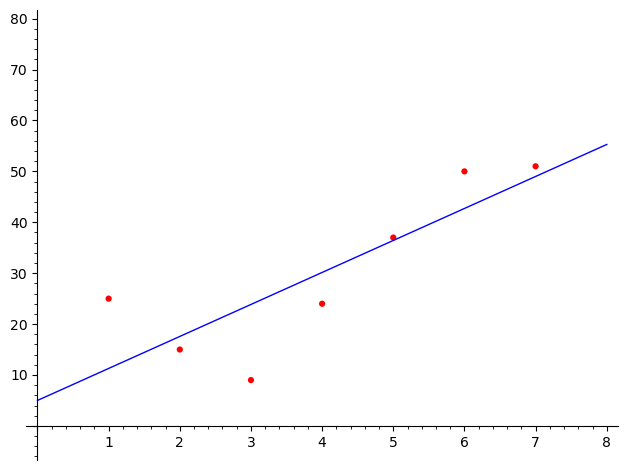

In [10]:
# We re-initialise plot figure first
G = plot([])
G += list_plot(data, size = 20, color = 'red', 
xmin = 0, xmax = 8, ymin = -5, ymax = 80)
# We define the function corresponding to the least squares line
v = vector(X)
f = v[0] * x + v[1]
f
# We add the graph of f to the scatter plot
G += f.plot(xmin=0,xmax=8,ymin=-5,ymax=80)
G

In [11]:
# We introduce a matrix A with three columns
# This corresponds to a change in the approximation model (see below)
A = matrix(QQ, [[1,1,1],[4,2,1],[9,3,1],[16,4,1],[25,5,1],[36,6,1],[49,7,1]])
show(A)

[ 1  1  1]
[ 4  2  1]
[ 9  3  1]
[16  4  1]
[25  5  1]
[36  6  1]
[49  7  1]

In [12]:
# Consequently, there is a new matrix M (see below for the explanation)
M = (A.transpose()*A).inverse()*A.transpose()
show(M)

[  5/84      0  -1/28  -1/21  -1/28      0   5/84]
[ -7/12  -1/14    1/4   8/21   9/28   1/14 -31/84]
[   9/7    3/7   -1/7   -3/7   -3/7   -1/7    3/7]

In [13]:
# As well as a new projection matrix P
P = A*M
show(P)

[16/21  5/14  1/14 -2/21  -1/7 -1/14  5/42]
[ 5/14   2/7  3/14   1/7  1/14     0 -1/14]
[ 1/14  3/14   2/7   2/7  3/14  1/14  -1/7]
[-2/21   1/7   2/7   1/3   2/7   1/7 -2/21]
[ -1/7  1/14  3/14   2/7   2/7  3/14  1/14]
[-1/14     0  1/14   1/7  3/14   2/7  5/14]
[ 5/42 -1/14  -1/7 -2/21  1/14  5/14 16/21]

In [14]:
# And a new projected vector (see below for the explanation)
X = M*Y
show(X)

[  73/42]
[-160/21]
[  181/7]

Note that, with this technology, we can easily modify the model and run the same computations (the theorem remains valid even if $ A $ has more than two columns!).

Say we want to approximate our scatter plot not by a line but by a parabola, of equation 
$$ 
y= a x^2 + b x + c \, . 
$$ 
Then we are considering the optimization problem
$$
\min_{(a,b,c)\in\mathbb{R}^3} \big(y_1-(ax_1^2+bx_1+c)\big)^2 + \big(y_2-(ax_2^2+bx_2+c)\big)^2 +\,\ldots \,+ \big(y_7-(ax_7^2+bx_7+c)\big)^2
$$
or, in matrix form, 
$$
\min_{(a,b,c)\in\mathbb{R}^3} \|Y-AX\|^2 \,, 
$$ 
where
$$ X=\begin{pmatrix}a\\b\\ c\end{pmatrix}\,,\quad 
A = \begin{pmatrix} x_1^2 & x_1 & 1\\ x_2^2 & x_2 & 1\\ \vdots\\ x_7^2 & x_7 & 1\end{pmatrix} 
= \left(\begin{array}{rrr}
1 & 1 & 1 \\
4 & 2 & 1 \\
9 & 3 & 1 \\
16 & 4 & 1 \\
25 & 5 & 1 \\
36 & 6 & 1 \\
49 & 7 & 1
\end{array}\right)
\in \mathrm{Mat}(7\times 3;\mathbb{R})\quad 
\text{and}\quad 
Y = 
\left(\begin{array}{r}
25 \\
15 \\
9 \\
24 \\
37 \\
50 \\
51
\end{array}\right)\,.
$$ 
The matrix $A$ has rank $3$, for otherwise we would have a non-zero polynomial $ax^2+bx+c$ with pairwise distinct root $(x_1,x_2,\,\ldots\,,x_7)$, which is impossible. So the previous Corollary applies and tells us that the solution of the problem is
$$
\begin{pmatrix}a\\b\\ c\end{pmatrix} 
= X 
= (A^tA)^{-1}A^t Y 
= \left(\begin{array}{rrrrrrr}
\frac{5}{84} & 0 & -\frac{1}{28} & -\frac{1}{21} & -\frac{1}{28} & 0 & \frac{5}{84} \\
-\frac{7}{12} & -\frac{1}{14} & \frac{1}{4} & \frac{8}{21} & \frac{9}{28} & \frac{1}{14} & -\frac{31}{84} \\
\frac{9}{7} & \frac{3}{7} & -\frac{1}{7} & -\frac{3}{7} & -\frac{3}{7} & -\frac{1}{7} & \frac{3}{7}
\end{array}\right)
\left(\begin{array}{r}
25 \\
15 \\
9 \\
24 \\
37 \\
50 \\
51
\end{array}\right)
= \left(\begin{array}{r}
\frac{73}{42} \\
-\frac{160}{21} \\
\frac{181}{7}
\end{array}\right)
\,.$$ 
This means that the equation of *the least squares parabola* for our minimisation problem is
$$
y = \frac{73}{42} x^2 - \frac{160}{21} x + \frac{181}{7}
$$
and we can also draw the least square line on the scatter plot.

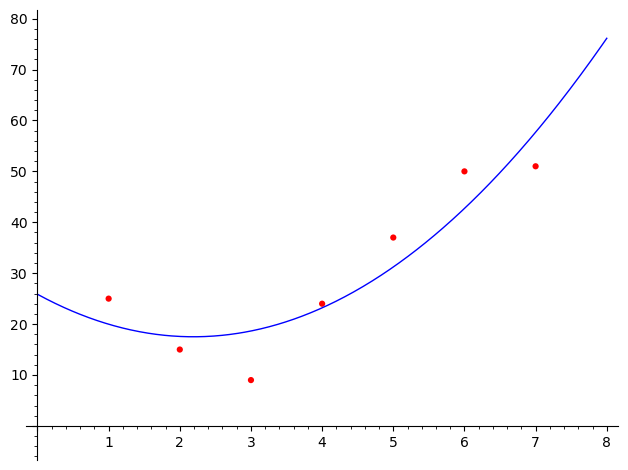

In [15]:
# We re-initialise plot figure first
G = plot([])
G += list_plot(data, size = 20, color = 'red', 
xmin = 0, xmax = 8, ymin = -5, ymax = 80)
# We define the function corresponding to the least squares line
v = vector(X)
x = var('x')
g = v[0] * x^2 + v[1] * x + v[2]
g
# We add the graph of f to the scatter plot
G += g.plot(xmin=0,xmax=8,ymin=-5,ymax=80)
G

In [16]:
# Here is the predicted value for y8 in the second model
y8 = f.substitute( x == 8)
show(y8)

387/7

In [17]:
# Here is a decimal approximation of y8
# Note that it is quite different from the prediction obtained with the first model
RR(y8)

55.2857142857143

If one does not recall the formula $ X=(A^tA)^{-1}A^t Y $ for the orthogonal projection of $ Y $ to $ \mathrm{Im}\, A $ under the assumption that $ A $ has full rank, one can ask `Sage` to find the *linear regression coefficients* in a model of our choosing, using the command `find_fit()`, which will automatically adjust the model to the data.

In [18]:
data = [(1,25),(2,15),(3,9),(4,24),(5,37),(6,50),(7,51)]
var('a, b, x')
model(x) = a*x + b
sol = find_fit(data,model)
show(sol)

[a == 6.285714285725815, b == 5.000000000008724]

In [19]:
# This gives us the following equation for the least squares line
fnum = model(a=sol[0].rhs(),b=sol[1].rhs())
show(fnum)

6.285714285725815*x + 5.000000000008724

If we compare this to the exact value we found using the mathematical formula, which was
$$ y = \frac{44}{7} x + 5 \thickapprox 6.28571428571 \, x + 5 \,, $$
we see that *the values returned using* `find_fit()` *are **not** exact* (just look at the $ 5 $). However, the numerical error is not very big, so this is good enough for our purposes (date approximation and short-term prediction).

The same type of numerical error occurs with the least squares parabola, as we check below.

In [20]:
# find_fit() but with a different model
var('a, b, c, x')
model2(x) = a*x^2 + b*x +c
sol2 = find_fit(data,model2)
# Equation for the least squares parabola
gnum = model2(a=sol2[0].rhs(),b=sol2[1].rhs(),c=sol2[2].rhs())
show(gnum)

1.7380952380968477*x^2 - 7.619047619066416*x + 25.857142857197083

In [21]:
# To compare, we recall the exact value of the least squares parabola coefficients
show(g)

73/42*x^2 - 160/21*x + 181/7

In [22]:
# Let us for instance compare the constant coefficients of these two quadratic polynomial
# They are very close to one another as decimal numbers
c1 = RR(gnum.substitute( x == 0 ))
c2 = RR(g.substitute( x == 0))
show( "c1-c2 = ", c1-c2 )

'c1-c2 = ' 5.42250688795320e-11

In [23]:
# However, they are not equal
c1 == c2

False

---